# Chapter 2 : NLP intro

시소러스 : 뜻이 비슷한 단어 (유의어 들이 그룹으로 분류되어 있음)

시소러스를 이용해서 뜻을 유추할 수 있음

현재 가장 유명한 시소러스는 WordNet으로 프린스턴 대박에서 구축하는 시소러스이다.

## 시소러스의 문제점

1. 새로운 단어가 생겨나고 옛말은 잊혀진다. 하지만 이 경향을 파악하기 힘들다.

ex) 자강두천 .. , 사흘 나흘 이레 여드레 거의 안쓰게 됨


2. 사람 비용이 크다.

시소러스를 만드는데 엄청난 임적 비용이 발생한다

3. 단어의 미묘한 차이를 표현할 수 없다.

누리끼리하다. 노랗다. 등등은 비슷한 뜻이지만 느낌이 다르다. 이를 모두 클러스터링하기 때문에 표현할 수 없다.

## 통계 기반 기법

corpus를 이용하는 방법. 

corpus는 말뭉치라는 뜻으로 대량의 텍스트 데이터를 의미한다.

In [19]:
text = 'You say goodbye and I say hello.'
text

'You say goodbye and I say hello.'

In [20]:
text = text.lower()
text = text.replace('.', ' .')
print(text)

words = text.split(' ')
words

you say goodbye and i say hello .


['you', 'say', 'goodbye', 'and', 'i', 'say', 'hello', '.']

In [21]:
word_to_id = {}
id_to_word = {}

for word in words:
    if word not in word_to_id:
        new_id = len(word_to_id)
        word_to_id[word] = new_id
        id_to_word[new_id] = word

print(word_to_id)
print(id_to_word)

{'you': 0, 'say': 1, 'goodbye': 2, 'and': 3, 'i': 4, 'hello': 5, '.': 6}
{0: 'you', 1: 'say', 2: 'goodbye', 3: 'and', 4: 'i', 5: 'hello', 6: '.'}


In [15]:
import numpy as np

corpus = [word_to_id[w] for w in words]
corpus = np.array(corpus)
print(corpus)

[0 1 2 3 4 1 5]


In [5]:
import numpy as np

def preprocess(text):
    text = text.lower()
    text = text.replace('.', ' .')
    words = text.split(' ')

    word_to_id = {}
    id_to_word = {}
    for word in words:
        if word not in word_to_id:
            new_id = len(word_to_id)
            word_to_id[word] = new_id
            id_to_word[new_id] = word
    
    corpus = np.array([word_to_id[w] for w in words])
    return corpus, word_to_id, id_to_word

In [6]:
corpus, word_to_id, id_to_word = preprocess('You must to be post doctor.')
print(corpus)
print(word_to_id)
print(id_to_word)

[0 1 2 3 4 5 6]
{'you': 0, 'must': 1, 'to': 2, 'be': 3, 'post': 4, 'doctor': 5, '.': 6}
{0: 'you', 1: 'must', 2: 'to', 3: 'be', 4: 'post', 5: 'doctor', 6: '.'}


분산 표현 : 색을 (R, G, B) 로 표현하듯 단어의 의미도 벡터로 표현한 것

## 분포 가설

단어의 의미는 주변 단어에 의해 형성된다.

단어 자체에는 의미가 없고 단어가 사용된 맥락이 의미를 형성한다는 뜻임.

맥락의 크기를 윈도우라고 하며, 좌우 단어의 갯수를 의미한다.

윈도우의 크기가 1이면 양옆 한단어씩, 크기가 2이면 두 단어씩 맥락에 포함시킨다.

In [8]:
import sys
sys.path.append('..')
import numpy as np
from common.util import preprocess

text = 'I can not get you all that stuff, But I can give you all my love.'
corpus, word_to_id, id_to_word = preprocess(text)

print(corpus)

print(id_to_word)

[ 0  1  2  3  4  5  6  7  8  0  1  9  4  5 10 11 12]
{0: 'i', 1: 'can', 2: 'not', 3: 'get', 4: 'you', 5: 'all', 6: 'that', 7: 'stuff,', 8: 'but', 9: 'give', 10: 'my', 11: 'love', 12: '.'}


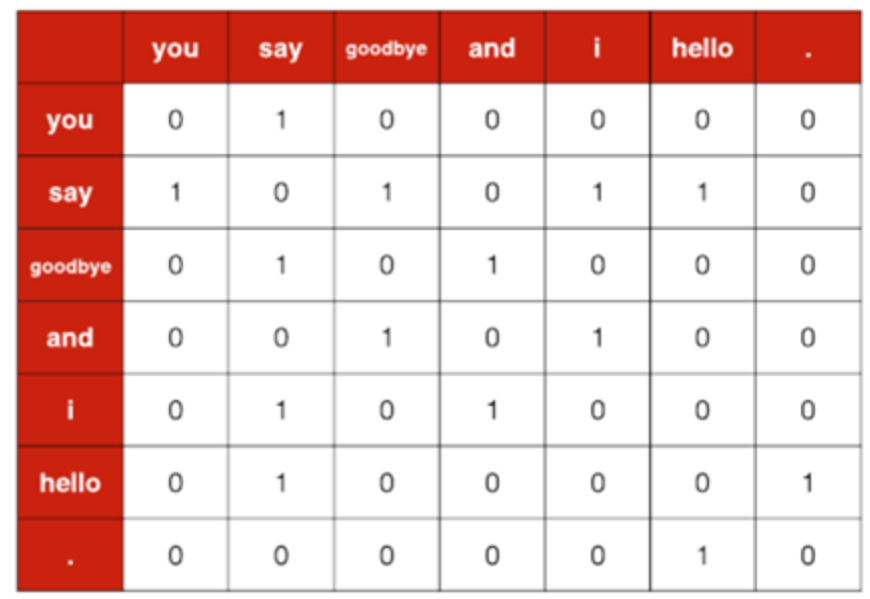

다음과 같이 맥락에 대해 벡터로 표현한다

아래는 corpus와 vocab_size가 들어오면 자동으로 벡터로 출력해주는 함수이다.

In [9]:
def create_co_matrix(corpus, vocab_size, window_size = 1):
    corpus_size = len(corpus)
    co_matrix = np.zeros((vocab_size, vocab_size), dtype=np.int32)

    for idx, word_id in enumerate(corpus):
        for i in range(1, window_size+1):
            left_idx = idx - i
            right_idx = idx + i

            if left_idx >= 0:
                left_word_id = corpus[left_idx]
                co_matrix[word_id, left_word_id] += 1
            
            if right_idx < corpus_size:
                right_word_id = corpus[right_idx]
                co_matrix[word_id, right_word_id] += 1

    return co_matrix

In [18]:
create_co_matrix(corpus, len(word_to_id), window_size=2)

array([[0, 2, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0],
       [2, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0],
       [1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 1, 1, 0, 2, 1, 0, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 2, 0, 1, 1, 0, 1, 1, 1, 0],
       [0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0],
       [1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0],
       [1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1],
       [0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0]])